# Modeling with Naive Bayes

#### We build multiple Naive Bayes Models to Train on cleaned text and variables: 
#### Relevancy_score (highly relevant (4), very relevant (3), relevant (2), minimally relevant (1), not relevant (0))
#### Treatment_Number (user receives treatment (1), user does not receive treatment (0))
#### Recommendation_Score (user recommends treatment (1), user does not recommend treatment (0))

In [35]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")
import seaborn as sns

In [36]:
data_df = pd.read_csv("enumerated_rel_test_comments.csv")

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,  classification_report
from sklearn.model_selection import train_test_split
from collections import defaultdict
from imblearn.over_sampling import SMOTE

In [38]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
feature_names = vectorizer1.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y1 = data_df.Relevancy_Score
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=100, test_size=0.2, stratify=y1)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y1_train_res = sm.fit_resample(X_train_vect, y1_train)

In [39]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y1_train_res)

MultinomialNB()

In [40]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y1_pred = nb.predict(X_test_vect)

In [41]:
# Evaluate the model
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.7083333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.82        84
           1       0.44      0.31      0.36        26
           2       1.00      0.29      0.44         7
           3       0.00      0.00      0.00         3

    accuracy                           0.71       120
   macro avg       0.55      0.37      0.41       120
weighted avg       0.68      0.71      0.68       120



/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

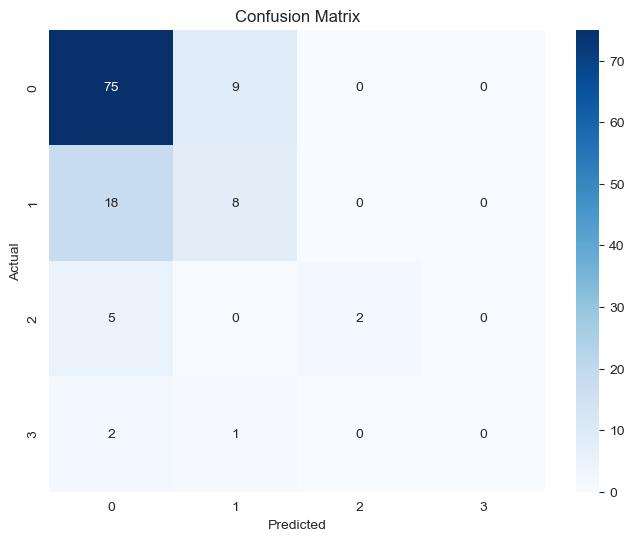

In [42]:
#Produce the confusion matrix 
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
feature_names = vectorizer1.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y2 = data_df.Treatment_Number
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=200, test_size=0.2,stratify=y2)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y2_train_res = sm.fit_resample(X_train_vect, y2_train)

In [44]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y2_train_res)

MultinomialNB()

In [45]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y2_pred = nb.predict(X_test_vect)

In [46]:
# Evaluate the model
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       107
           1       0.67      0.15      0.25        13

    accuracy                           0.90       120
   macro avg       0.79      0.57      0.60       120
weighted avg       0.88      0.90      0.87       120



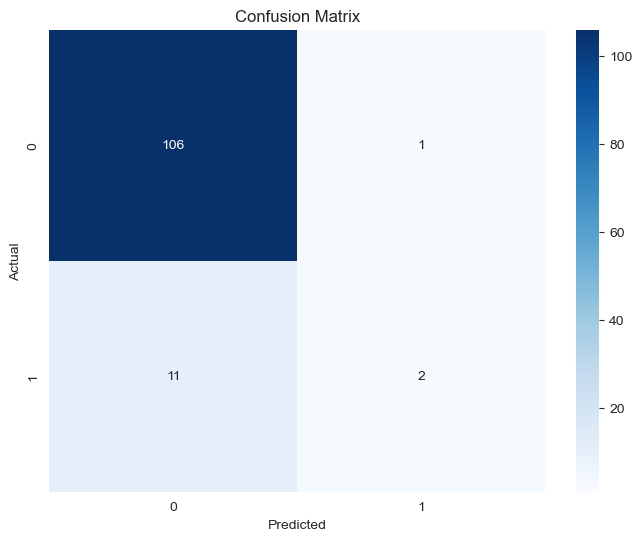

In [47]:
#Produce the confusion matrix 
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
feature_names = vectorizer1.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y3 = data_df.Recommendation_Score
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=300, test_size=0.2,stratify=y3)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y3_train_res = sm.fit_resample(X_train_vect, y3_train)

In [49]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y3_train_res)

MultinomialNB()

In [50]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y3_pred = nb.predict(X_test_vect)

In [51]:
# Evaluate the model
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.9583333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       115
           1       0.00      0.00      0.00         5

    accuracy                           0.96       120
   macro avg       0.48      0.50      0.49       120
weighted avg       0.92      0.96      0.94       120



/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

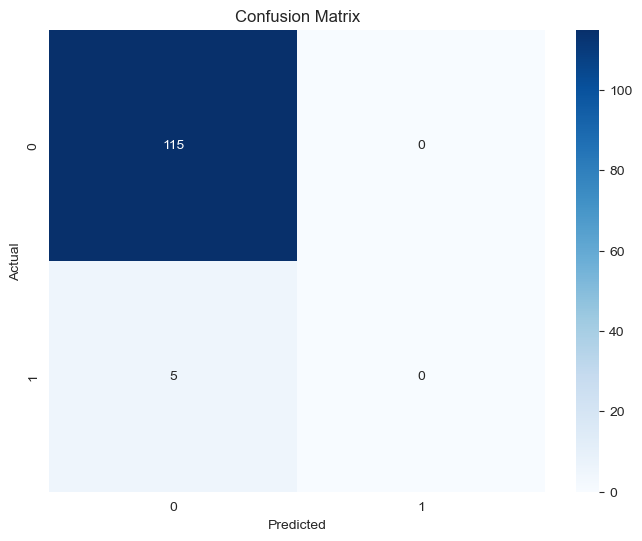

In [52]:
#Produce the confusion matrix 
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y1 = data_df.Relevancy_Score
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=400, test_size=0.2,stratify=y1)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y1_train_res = sm.fit_resample(X_train_vect, y1_train)

In [54]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y1_train_res)

MultinomialNB()

In [55]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y1_pred = nb.predict(X_test_vect)

In [56]:
# Evaluate the model
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.425

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.35      0.49        84
           1       0.29      0.65      0.40        26
           2       0.17      0.57      0.26         7
           3       0.25      0.33      0.29         3

    accuracy                           0.42       120
   macro avg       0.39      0.48      0.36       120
weighted avg       0.68      0.42      0.45       120



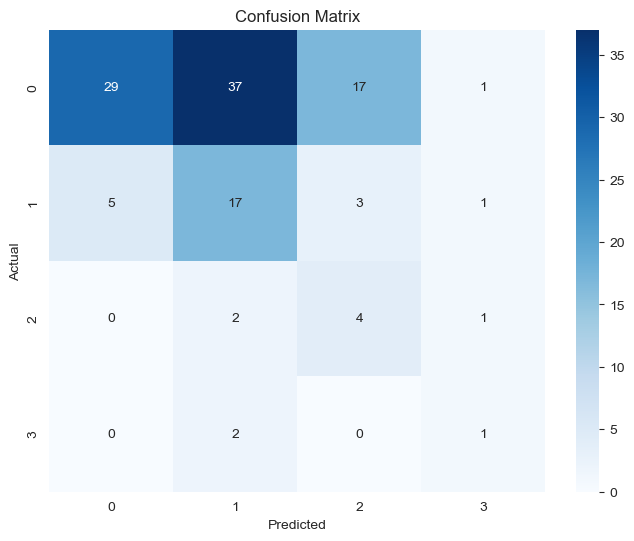

In [57]:
#Produce the confusion matrix 
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [58]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y2 = data_df.Treatment_Number
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=500, test_size=0.2,stratify=y2)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y2_train_res = sm.fit_resample(X_train_vect, y2_train)

In [59]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y2_train_res)

MultinomialNB()

In [60]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y2_pred = nb.predict(X_test_vect)

In [61]:
# Evaluate the model
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.8166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       107
           1       0.32      0.62      0.42        13

    accuracy                           0.82       120
   macro avg       0.63      0.73      0.66       120
weighted avg       0.88      0.82      0.84       120



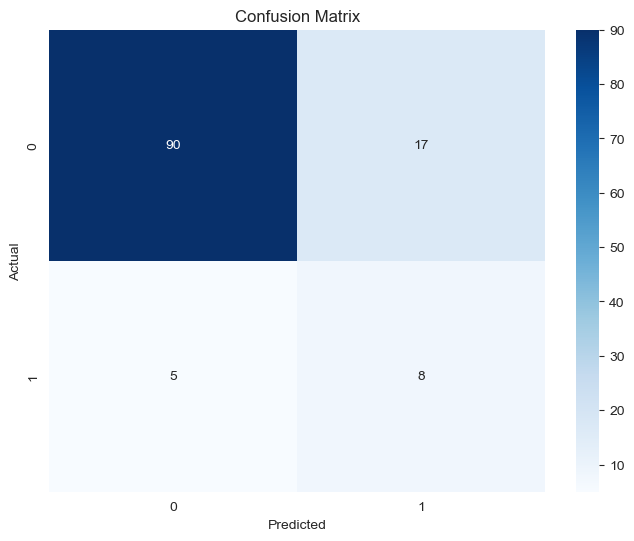

In [62]:
#Produce the confusion matrix 
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [63]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y3 = data_df.Recommendation_Score
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=600, test_size=0.2,stratify=y3)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y3_train_res = sm.fit_resample(X_train_vect, y3_train)

In [64]:
#Create Instance of Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_res, y3_train_res)

MultinomialNB()

In [65]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y3_pred = nb.predict(X_test_vect)

In [66]:
# Evaluate the model
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.8833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       115
           1       0.20      0.60      0.30         5

    accuracy                           0.88       120
   macro avg       0.59      0.75      0.62       120
weighted avg       0.95      0.88      0.91       120



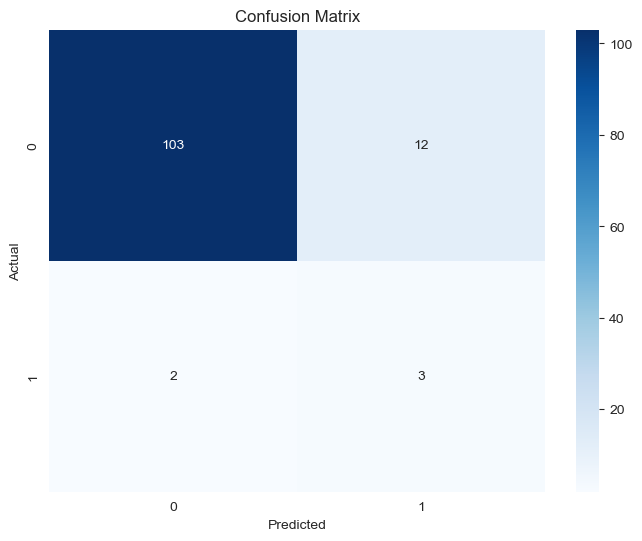

In [67]:
#Produce the confusion matrix 
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()